# CEO-Request Challenge

## 1. Summary of Problem Statement

❓ **How could Olist improve its profit** ❓

### P&L Rules

#### Revenues  
**Sales fees:** Olist takes a **10% cut** on the product price (excl. freight) of each order delivered  
**Subscription fees:** Olist charges **80 BRL by month** per seller

#### Costs
**Reputation costs** *estimated* per order with bad reviews (<= 3 stars)  

💡 In the long term, bad customer experience has business implications: low repeat rate, immediate customer support cost, refunds or unfavorable word of mouth communication. We will assume that we have an estimate measure of the monetary cost for each bad review:
```python
# review_score: cost(BRL)
{'1 star': 100
'2 stars': 50
'3 stars': 40
'4 stars': 0
'5 stars': 0}
```

**IT costs:** Olist's **total cumulated IT Costs** scale with the square root of the total number of sellers that has ever join the platform, as well as the square root of the total cumulated number of products that was ever sold.  

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_products}$  
Olist's data team gave us the following values for these scaling parameters:
- $\alpha = 3157.27$
- $\beta = 978.23$

💡 Both number of sellers to manage and sales transaction are costly for IT systems.  
💡 Yet square roots reflect scale-effects: IT-system are often more efficient as they grow bigger.  
💡 Alpha > Beta means that "Olist has a lower IT Cost with few sellers selling a lot of products rather than the opposite  
- with **1000 sellers** and a total of **100 products** sold, the total IT cost accumulates to 109,624 BRL
- with **100 sellers** and a total of **1000 products** sold, the total IT cost accumulates to 62,507 BRL

Finally, The IT department also told you that since the birth of the marketplace, cumulated IT costs have amounted to **500,000 BRL**.

### Key Findings, so far

- `wait_time` is the most significant factor behind low review scores  
- `wait_time` is made up of seller's `delay_to_carrier` + `carrier_delivery_time`.  
- The latter being outside of Olist's direct control, improving it is not a quick-win recommendation
- On the contrary, a better selection of `sellers` can positively impact the `delay_to_carrier` and reduce the number of bad `review_scores` on Olist.
- Comments of the bad reviews showed that some were linked to the seller or to the product itself.

💡 We recommend you to start with the the guided seller analysis in part 2 below  
💪 But feel free to investigate into other hypothesis instead with part 3

## 2. Should Olist remove under-performing sellers from its marketplace? 🕵🏻
*(recommended)*

To analyze the impact of removing the worse sellers from Olist's marketplace, we will perform a **what-if analysis**

👉 **What would have happened if Olist had never accepted these sellers in the first place?**  

*(In practice, it's hard to know in advance who is a good seller, but let's start with this approach and iterate later).*

### 2.1 Data Preparation

Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` it brings
- the `review_costs` associated with all its bad reviews
- the resulting `profits` (revenues - costs)

👉 Write down a step-by-step strategy to create the DataFrame you need


⚠️ Don't start from scratch, update your existing package 😉

Starting from the `Seller` class of your `olist` package:

Edit the `get_training_data` method so that the DataFrame it returns contains the fields:
- `revenues`: sum of subscription and sales fees revenues
- `cost_of_reviews`: sum of costs associated with bad reviews
    - edit the `get_review_score` method of your `Seller` class as an intermediary step
- `profits`: `revenues` - `cost_of_reviews`

### 2.2 What-if Analysis

👉 Time to perform the actual analysis, here are our steps:  

1️⃣ Create a method that will help us update the IT Costs after removing sellers along with the products they sold

2️⃣ Sort sellers by increasing profits

3️⃣ Remove sellers one by one, starting from the one with the lowest profit.
- For each number of sellers to remove, compute the financial impact on Olist global profits.

4️⃣ Find an optimal number of sellers to remove that maximizes either Olist's profit margin or profit.

## 3. Investigate other Approaches 🕵️
*(optional)*

- Should Olist remove the worst performing products / categories from its marketplace entirely?
- Should Olist remove only consistently underperforming sellers, after it has a honeymoon period of few months?
- Should Olist restrict seller/customer pairs between certain states to avoid delays?
- Should Olist acquire new sellers, with some cost assumptions to be suggested?
- ...

## Your turn!

🧺 Keep this notebook tidy! 

📅 🗣 📊 You will present your insights to your favorite TA at the end of this `Communicate` unit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers.default='notebook'

%load_ext autoreload
%autoreload 2

In [2]:
from olist.seller_updated import Seller
seller = Seller()

In [3]:
sellers = seller.get_training_data()

# Proposal

## Increase the company profit by 52%

In [4]:
olist_monthly_fee = 80
olist_sales_cut = 0.1
olist_it_costs_all_orders = 500000
olist_reputation_costs = sellers['cost_of_reviews'].sum()
olist_total_costs = olist_it_costs_all_orders + olist_reputation_costs 
sellers['subscription_revenues'] = sellers['months_on_olist'] * olist_monthly_fee
olist_subscription_revenues= sellers['subscription_revenues'].sum()
sellers['sales_revenues'] = olist_sales_cut * sellers['sales']
olist_sales_revenues = sellers['sales_revenues'].sum()
olist_gross_profits = sellers['revenues'].sum()
olist_net_profits = olist_gross_profits - olist_total_costs
olist_net_profits

667608.4440000001

## Analyzing best & worst sellers 

In [5]:
sorted_sellers = sellers.sort_values(by='profits',ascending=False).reset_index(drop=True)
sorted_sellers = sorted_sellers[sorted_sellers['profits'] >=0]

In [6]:
n_sellers = len(sorted_sellers['seller_id'].unique())
n_products_sold = sorted_sellers['quantity'].sum()

def IT_costs(alpha,beta):  # I can make this interactive
    return alpha*(n_sellers)**0.5 + beta*(n_products_sold)**0.5

olist_it_costs_all_orders = IT_costs(3157.27,978.23)
olist_monthly_fee =  80
olist_sales_cut = 0.1
olist_it_costs_all_orders = 414598
olist_reputation_costs = sorted_sellers['cost_of_reviews'].sum()
olist_total_costs = olist_it_costs_all_orders + olist_reputation_costs 
sorted_sellers['subscription_revenues'] = sorted_sellers['months_on_olist'] * olist_monthly_fee
olist_subscription_revenues = sorted_sellers['subscription_revenues'].sum()
sorted_sellers['sales_revenues'] = olist_sales_cut * sorted_sellers['sales']
olist_sales_revenues = sorted_sellers['sales_revenues'].sum()
olist_gross_profits = sorted_sellers['revenues'].sum()
olist_net_harsh_profits = olist_gross_profits - olist_total_costs
olist_net_increase_profit = (olist_net_harsh_profits-olist_net_profits)/olist_net_profits *100
olist_net_increase_profit

58.696773913183144

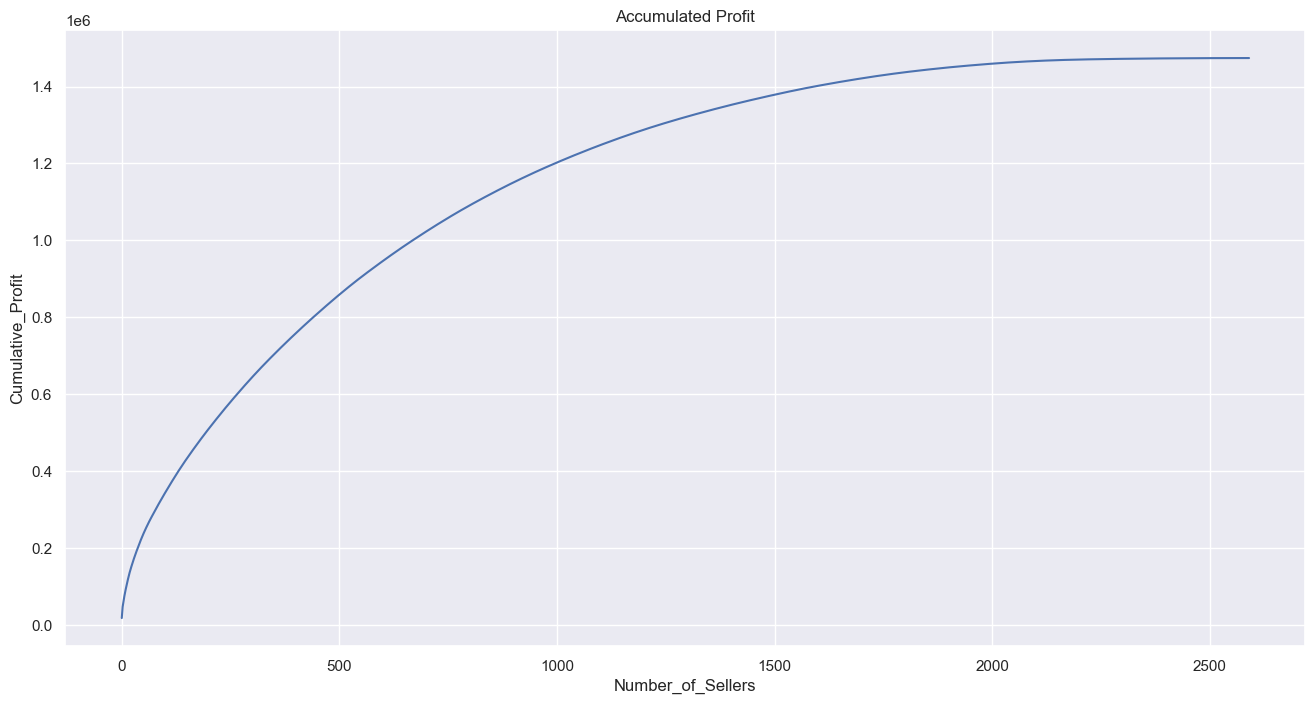

In [7]:
# calculate the cumulative sum of profits
sns.set_theme(rc={'figure.figsize':(16,8)})
cumulative_profits = sorted_sellers['profits'].cumsum()
# plot the cumulative sum of profits and the percentage of profits generated by each group of sellers
plt.figure(figsize=(16, 8))
plt.plot(sorted_sellers.index,cumulative_profits)
plt.xlabel('Number_of_Sellers')
plt.ylabel('Cumulative_Profit')
plt.grid(True)
plt.title('Accumulated Profit')
plt.show()

## Analyzing top 1000 sellers

In [8]:
# profit percentage contributed by top 1000 sellers:
total_profit = sorted_sellers['profits'].sum()
top_1000_sellers = sorted_sellers[:1000]
profit_top_1000_sellers = sorted_sellers['profits'][:1000].sum()
profit_percent_contribution_top_1000_sellers = (profit_top_1000_sellers/total_profit)*100

### Profit contributution by top 1000 sellers 

### 82%

In [9]:
print(f"{round(profit_percent_contribution_top_1000_sellers)}%")

82%


## Reason of high and steady performing sellers ?

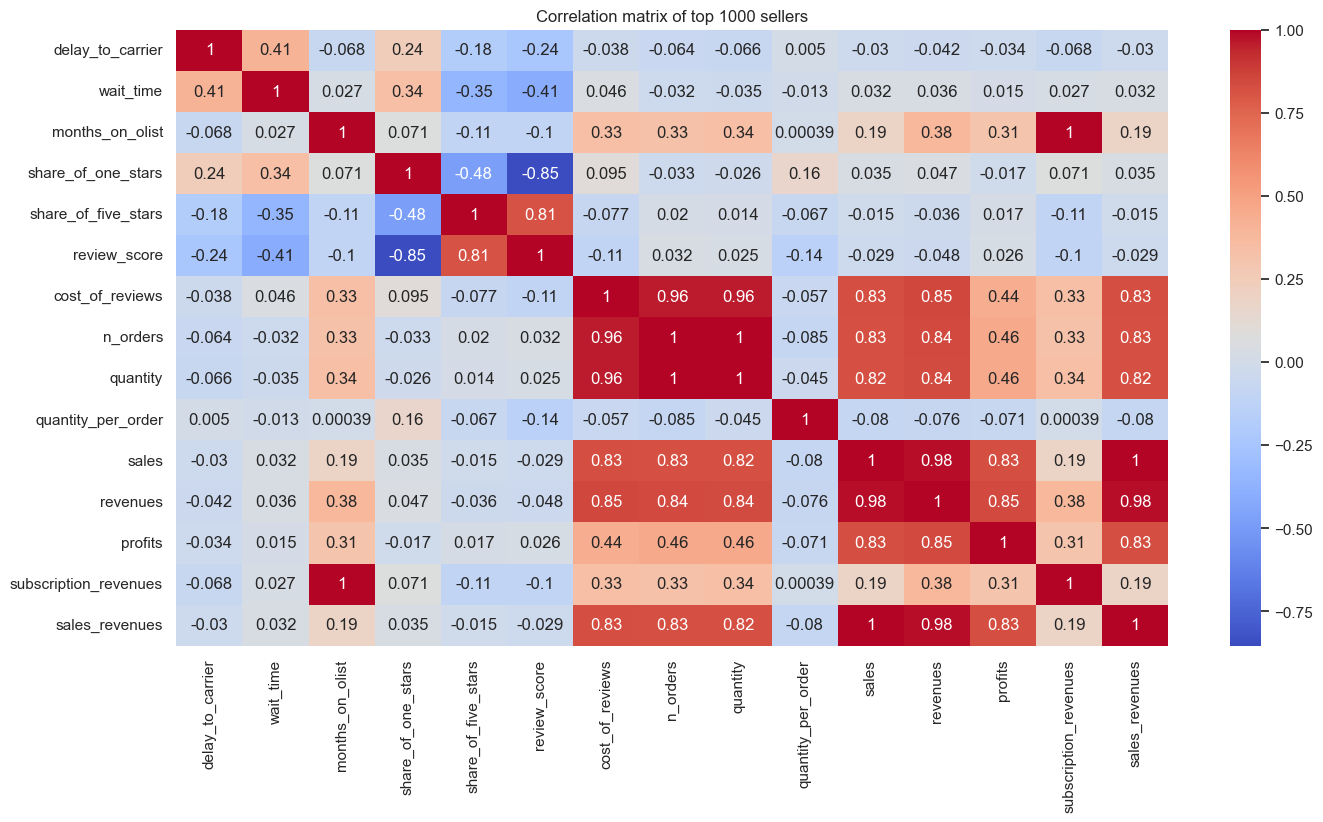

In [10]:
correlation_top_matrix = top_1000_sellers.corr()
sns.set_theme(rc={'figure.figsize':(16,8)})
plt.figure(figsize = (16,8))
plt.title('Correlation matrix of top 1000 sellers')
sns.heatmap(correlation_top_matrix,cmap='coolwarm',annot =True);

## Analyzing Last 1590 sellers

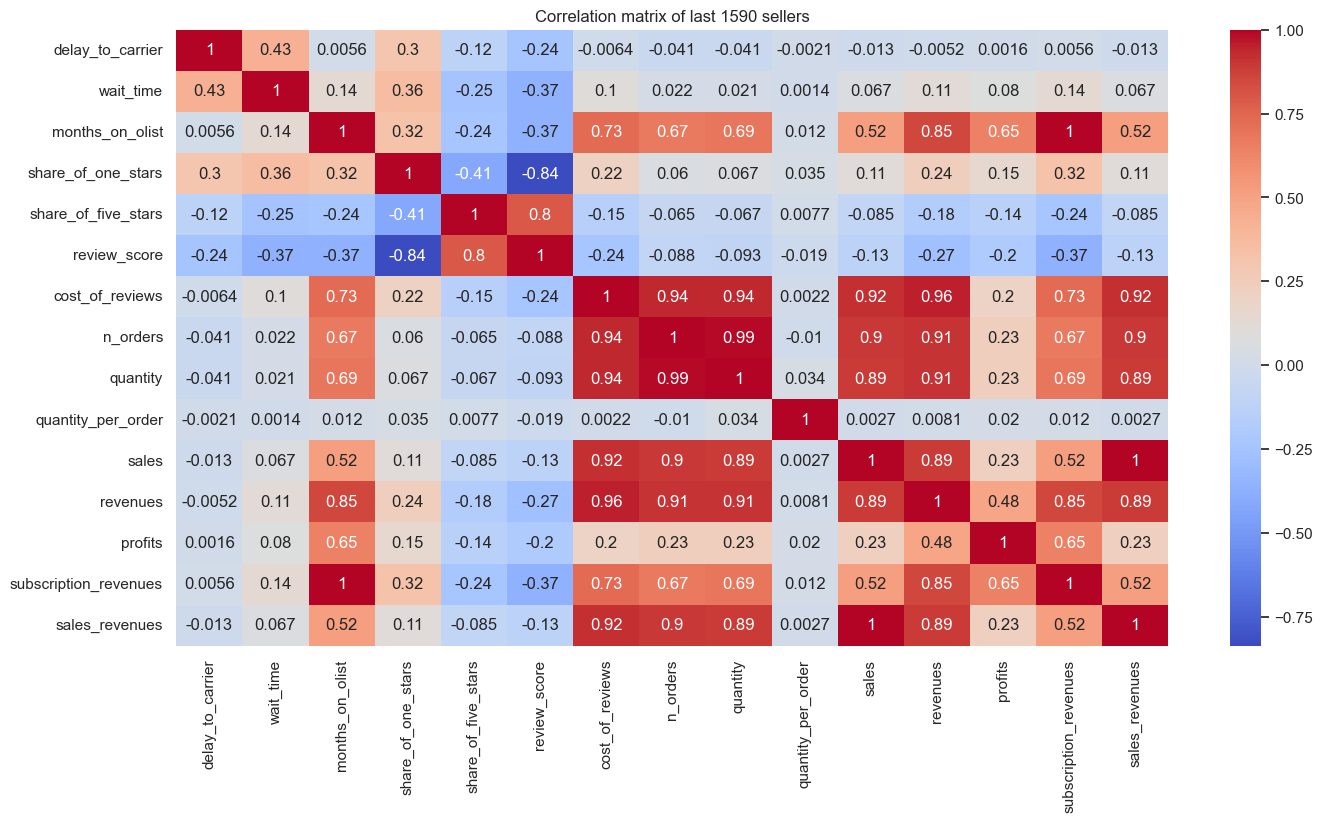

In [11]:
last_sellers = sorted_sellers[1000:]
sns.set_theme(rc={'figure.figsize':(16,8)})
correlation_last_matrix = last_sellers.corr()
plt.figure(figsize = (16,8))
plt.title('Correlation matrix of last 1590 sellers')
sns.heatmap(correlation_last_matrix,cmap='coolwarm',annot =True);

## Analyzing loss generating sellers

In [12]:
worst_sellers = sellers.sort_values(by='profits',ascending=False).reset_index(drop=True)
worst_sellers = worst_sellers[worst_sellers['profits'] <=0 ]

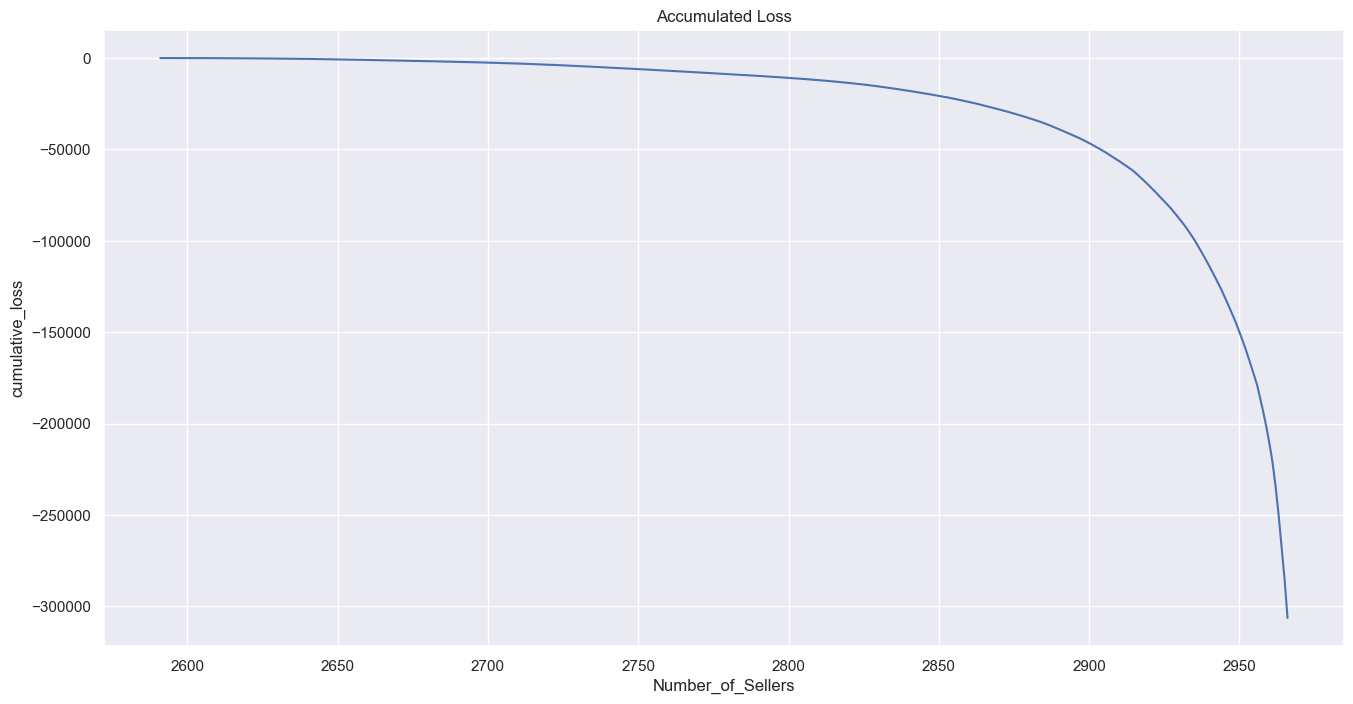

In [13]:
cumulative_loss = worst_sellers['profits'].cumsum()
sns.set_theme(rc={'figure.figsize':(16,8)})
# plot the cumulative sum of profits and the percentage of profits generated by each group of sellers
plt.figure(figsize=(16, 8))
plt.plot(worst_sellers.index,cumulative_loss)
plt.xlabel('Number_of_Sellers')
plt.ylabel('cumulative_loss')
plt.title('Accumulated Loss')
plt.grid(True)
plt.show()

## Reason of low performing sellers

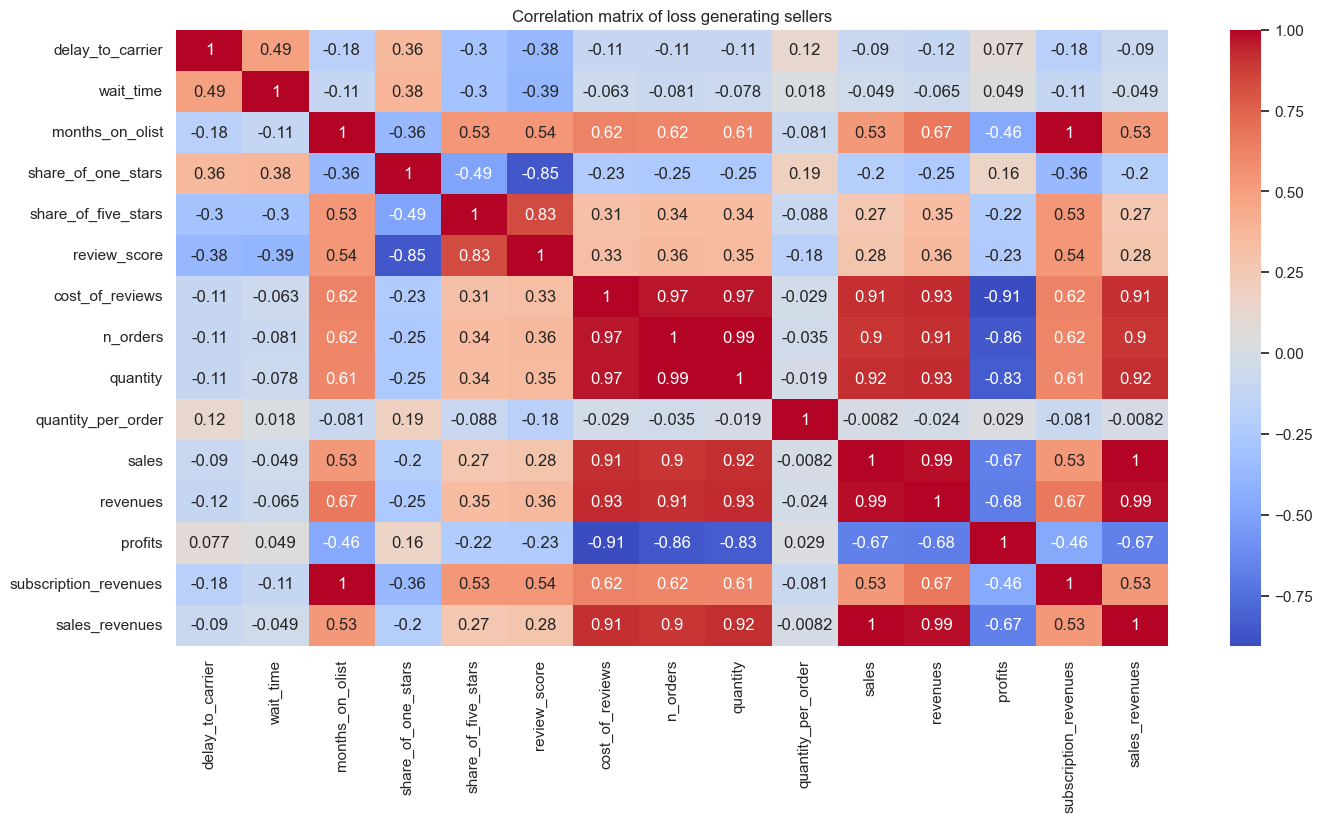

In [14]:
correlation_worst_matrix = worst_sellers.corr()
sns.set_theme(rc={'figure.figsize':(16,8)})
plt.figure(figsize = (16,8))
plt.title('Correlation matrix of loss generating sellers')
sns.heatmap(correlation_worst_matrix,cmap='coolwarm',annot =True);

## Low performing sellers even after honeymoon period

### Low performing sellers--> Who have been in company for more than 6 months and still generating loss.

## 127 sellers should be called for a meeting

In [15]:
remove_sellers = sellers[(sellers['profits'] <= 0) & (sellers['months_on_olist'] >= 6)].reset_index(drop=True)
len(remove_sellers)

127

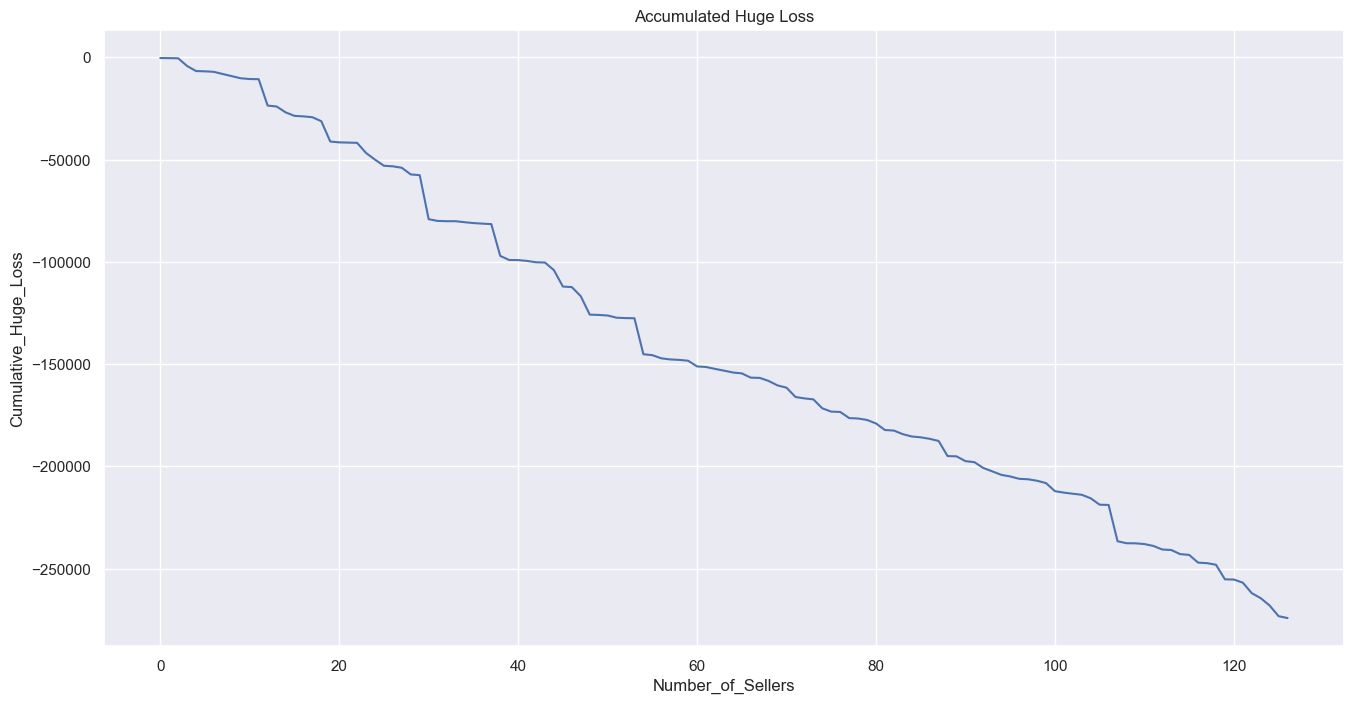

In [16]:
# calculate the cumulative sum of profits
cumulative_huge_loss = remove_sellers['profits'].cumsum()
sns.set_theme(rc={'figure.figsize':(16,8)})
# plot the cumulative sum of profits and the percentage of profits generated by each group of sellers
plt.figure(figsize=(16, 8))
plt.plot(remove_sellers.index,cumulative_huge_loss)
plt.xlabel('Number_of_Sellers')
plt.ylabel('Cumulative_Huge_Loss')
plt.title('Accumulated Huge Loss')
plt.grid(True)
plt.show()

In [17]:
mask =(sellers['profits'] <= 0) & (sellers['months_on_olist'] >= 6)
final_sellers = sellers.drop(index=sellers[mask].index)

In [18]:
n_final_sellers = len(final_sellers['seller_id'].unique())
n_final_products_sold = final_sellers['quantity'].sum()
def IT_final_costs(alpha,beta):  # I can make this interactive
    return alpha*(n_final_sellers)**0.5 + beta*(n_final_products_sold)**0.5
olist_it_final_costs_all_orders = IT_final_costs(3157.27,978.23)

In [19]:
olist_monthly_fee =  80
olist_sales_cut = 0.1
olist_reputation_costs = final_sellers['cost_of_reviews'].sum()
olist_total_costs = olist_it_final_costs_all_orders + olist_reputation_costs 
final_sellers['subscription_revenues'] = final_sellers['months_on_olist'] * olist_monthly_fee
olist_subscription_revenues = final_sellers['subscription_revenues'].sum()
final_sellers['sales_revenues'] = olist_sales_cut * final_sellers['sales']
olist_sales_revenues = final_sellers['sales_revenues'].sum()
olist_gross_profits = final_sellers['revenues'].sum()
olist_final_net_profits = olist_gross_profits - olist_total_costs
olist_final_net_profits

1014140.8575832911

## Removing 127 sellers

### Percentage increase in profit after their removal

### 52%

In [20]:
percent_increase_in_profit = (olist_final_net_profits - olist_net_profits)/olist_net_profits*100
print(f"{round(percent_increase_in_profit)}%")

52%
